# ESERCIZIO 1

In [21]:
from sklearn.datasets import fetch_olivetti_faces
olivetti = fetch_olivetti_faces()
imgs = olivetti.images
labels = olivetti.target
X = imgs.reshape((400, 4096)).transpose()

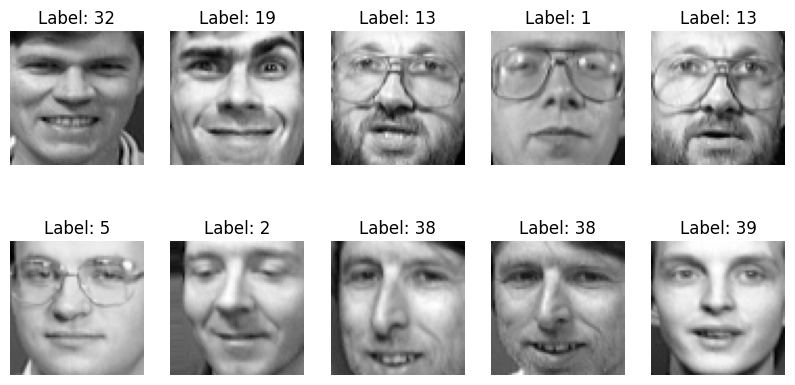

In [22]:
import numpy as np
import matplotlib.pyplot as plt
# Randomly select 10 indices
random_indices = np.random.choice(len(labels), size=10, replace=False)

# Plot the selected pictures
plt.figure(figsize=(10, 5))
for i, index in enumerate(random_indices, 1):
    plt.subplot(2, 5, i)
    plt.imshow(imgs[index], cmap='gray')
    plt.title(f'Label: {labels[index]}')
    plt.axis('off')

plt.show()

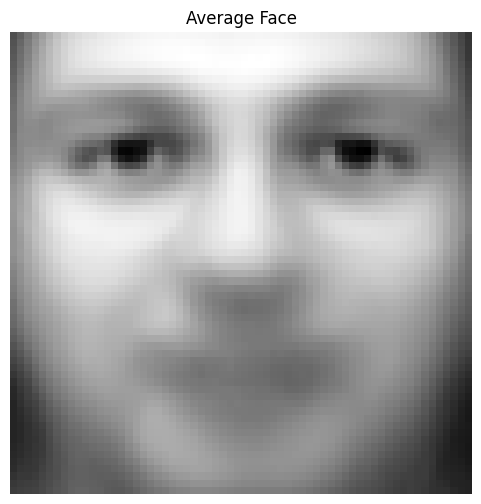

In [23]:
# Compute the average image
average_image = np.mean(imgs, axis=0)

# Visualize the average image
plt.figure(figsize=(6, 6))
plt.imshow(average_image, cmap='gray')
plt.title('Average Face')
plt.axis('off')
plt.show()

In [24]:
# Perform SVD with full_matrices=True
U_full, s_full, VT_full = np.linalg.svd(X, full_matrices=True)

# Perform SVD with full_matrices=False
U_reduced, s_reduced, VT_reduced = np.linalg.svd(X, full_matrices=False)

# Verify the shapes of the matrices
print("Shapes with full_matrices=True:")
print("U_full:", U_full.shape)
print("s_full:", s_full.shape)
print("VT_full:", VT_full.shape)

print("\nShapes with full_matrices=False:")
print("U_reduced:", U_reduced.shape)
print("s_reduced:", s_reduced.shape)
print("VT_reduced:", VT_reduced.shape)

Shapes with full_matrices=True:
U_full: (4096, 4096)
s_full: (400,)
VT_full: (400, 400)

Shapes with full_matrices=False:
U_reduced: (4096, 400)
s_reduced: (400,)
VT_reduced: (400, 400)


With full_matrices=False, the decomposition reduces the rank of the original matrix to the number of non-zero singular values. This can be more memory-efficient if the original matrix is of low rank.

In both cases, the reconstructed matrix can be obtained by multiplying the matrices U, S, and V^T (or VT). The shapes of the reconstructed matrices will match the original shape of the input matrix (X).








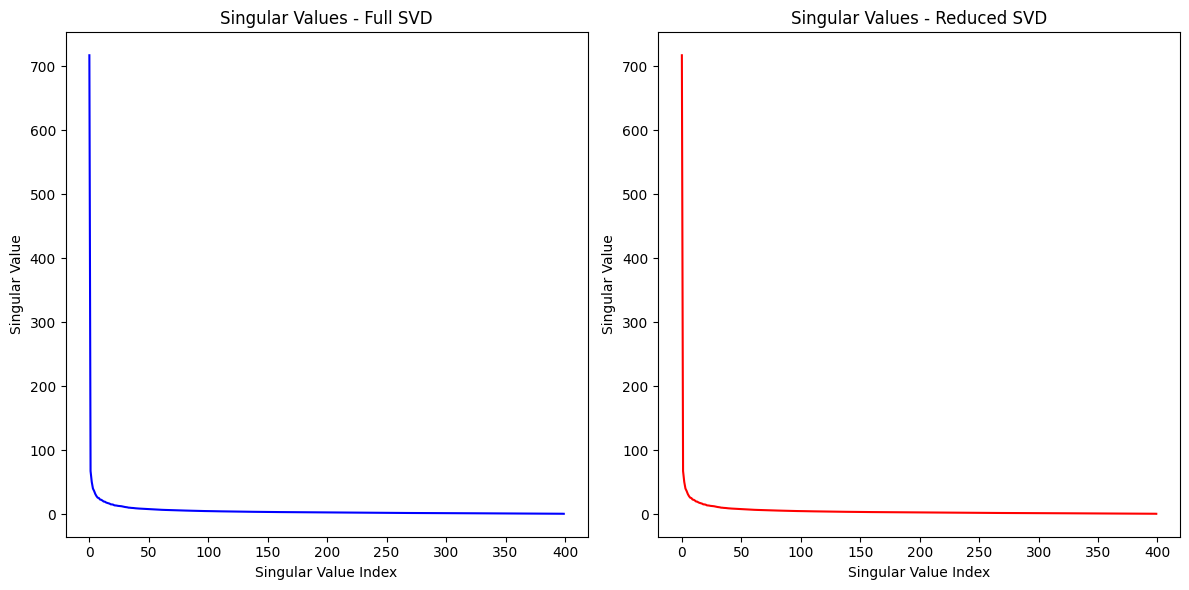

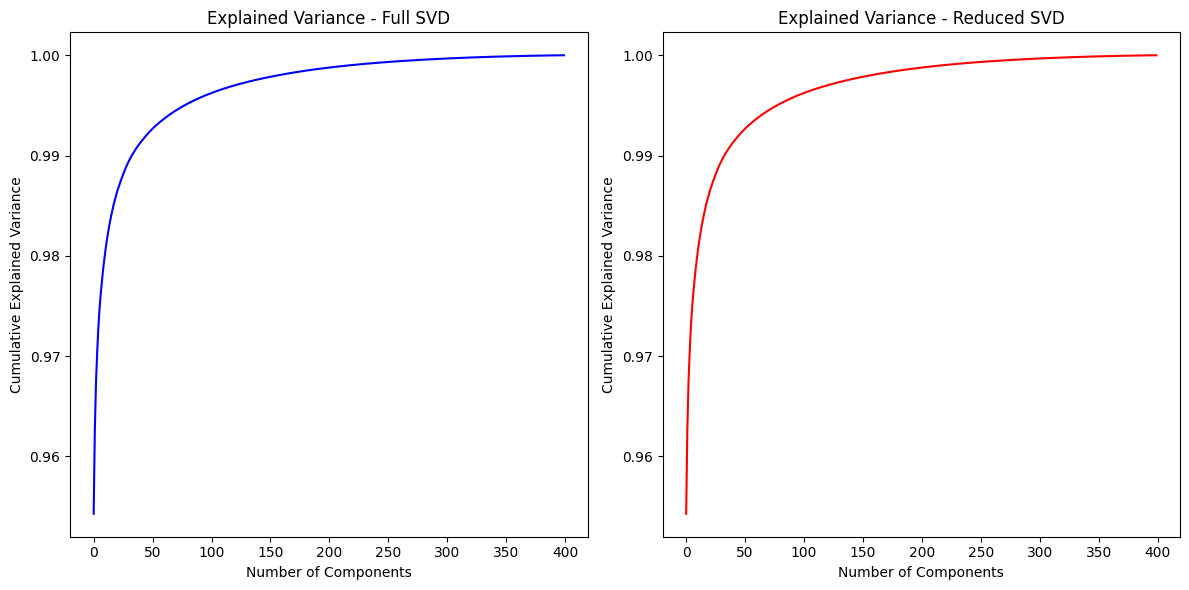

In [25]:
# Compute the cumulative sum of squared singular values
cumulative_variance_full = np.cumsum(s_full**2) / np.sum(s_full**2)
cumulative_variance_reduced = np.cumsum(s_reduced**2) / np.sum(s_reduced**2)

# Plot the trend of singular values
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.plot(s_full, linestyle='-', color='b', label='Full SVD')
plt.title('Singular Values - Full SVD')
plt.xlabel('Singular Value Index')
plt.ylabel('Singular Value')

plt.subplot(122)
plt.plot(s_reduced, linestyle='-', color='r', label='Reduced SVD')
plt.title('Singular Values - Reduced SVD')
plt.xlabel('Singular Value Index')
plt.ylabel('Singular Value')

plt.tight_layout()
plt.show()

# Plot the trend of "explained variance"
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.plot(cumulative_variance_full, linestyle='-', color='b', label='Full SVD')
plt.title('Explained Variance - Full SVD')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

plt.subplot(122)
plt.plot(cumulative_variance_reduced, linestyle='-', color='r', label='Reduced SVD')
plt.title('Explained Variance - Reduced SVD')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

plt.tight_layout()
plt.show()

5. Implement a function computing the randomized SVD of rank k for a generic matrix.

In [26]:
def randomized_SVD(A, k):
  n, m = A.shape[0], A.shape[1]
  P = np.random.randn(m, k)
  Z = A @ P
  Q, R = np.linalg.qr(Z)
  Y = Q.T @ A
  U_Y, s, VT = np.linalg.svd(Y, full_matrices = False)
  U = Q @ U_Y
  return U, s, VT


6. Set k = 1, 5, 10, 50, 100 and plot the approximated singular values together with the exact ones.

  0%|          | 0/5 [00:00<?, ?it/s]

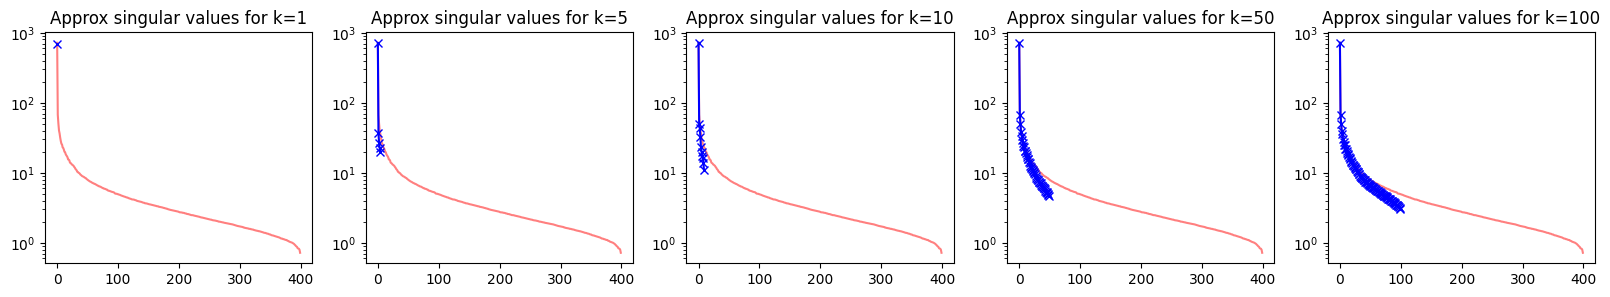

In [28]:
from tqdm.notebook import tqdm
import time

k = [1, 5, 10, 50, 100]
fig, axes = plt.subplots(nrows = 1, ncols = len(k), figsize = (20, 3))

for i in tqdm(range(len(k))):
    U_approx, s_approx, VT_approx = randomized_SVD(X, k[i])
    axes[i].semilogy(s_full, color='red', alpha=0.5)
    axes[i].semilogy(s_approx, 'x-', color='blue')
    axes[i].set_title(f'Approx singular values for k={k[i]}')

7. Use PCA to perform dimensionality reduction on the dataset of images for rank k = 1, 5, 10, 50, 100 by
means of exact SVD. Compute the reconstruction error and plot it as a function of k . Comment the results.

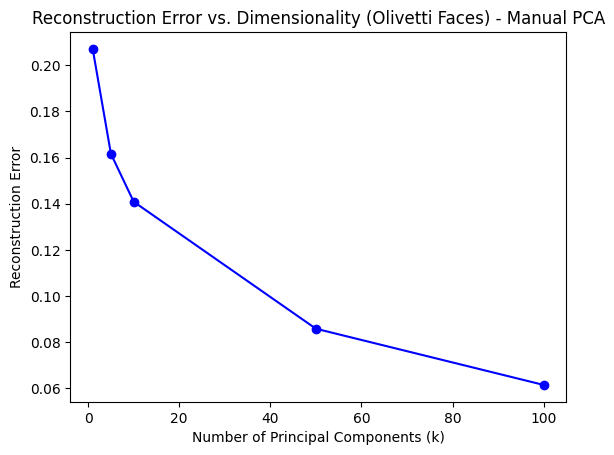

In [29]:
# Center the data (subtract mean)
mean_vec = np.mean(X, axis=0)
X_centered = X - mean_vec

# Calculate the covariance matrix
cov_matrix = np.cov(X_centered, rowvar=False)

# Find eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sort eigenvalues and corresponding eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Values of k to test
k_values = [1, 5, 10, 50, 100]

# List to store reconstruction errors for each k
reconstruction_errors = []

# Compute reconstruction errors manually for each value of k
for k in k_values:
    # Select the first k eigenvectors
    selected_eigenvectors = eigenvectors[:, :k]

    # Project the centered data onto the selected eigenvectors
    X_projected = X_centered @ selected_eigenvectors

    # Reconstruct the data
    X_approximated = X_projected @ selected_eigenvectors.T + mean_vec

    # Compute reconstruction error
    reconstruction_error = np.linalg.norm(X - X_approximated, ord='fro') / np.linalg.norm(X, ord='fro')
    reconstruction_errors.append(reconstruction_error)

# Plotting the reconstruction errors
plt.plot(k_values, reconstruction_errors, marker='o', linestyle='-', color='b')
plt.title('Reconstruction Error vs. Dimensionality (Olivetti Faces) - Manual PCA')
plt.xlabel('Number of Principal Components (k)')
plt.ylabel('Reconstruction Error')
plt.show()

8. Visualize the first 30 principal axes.

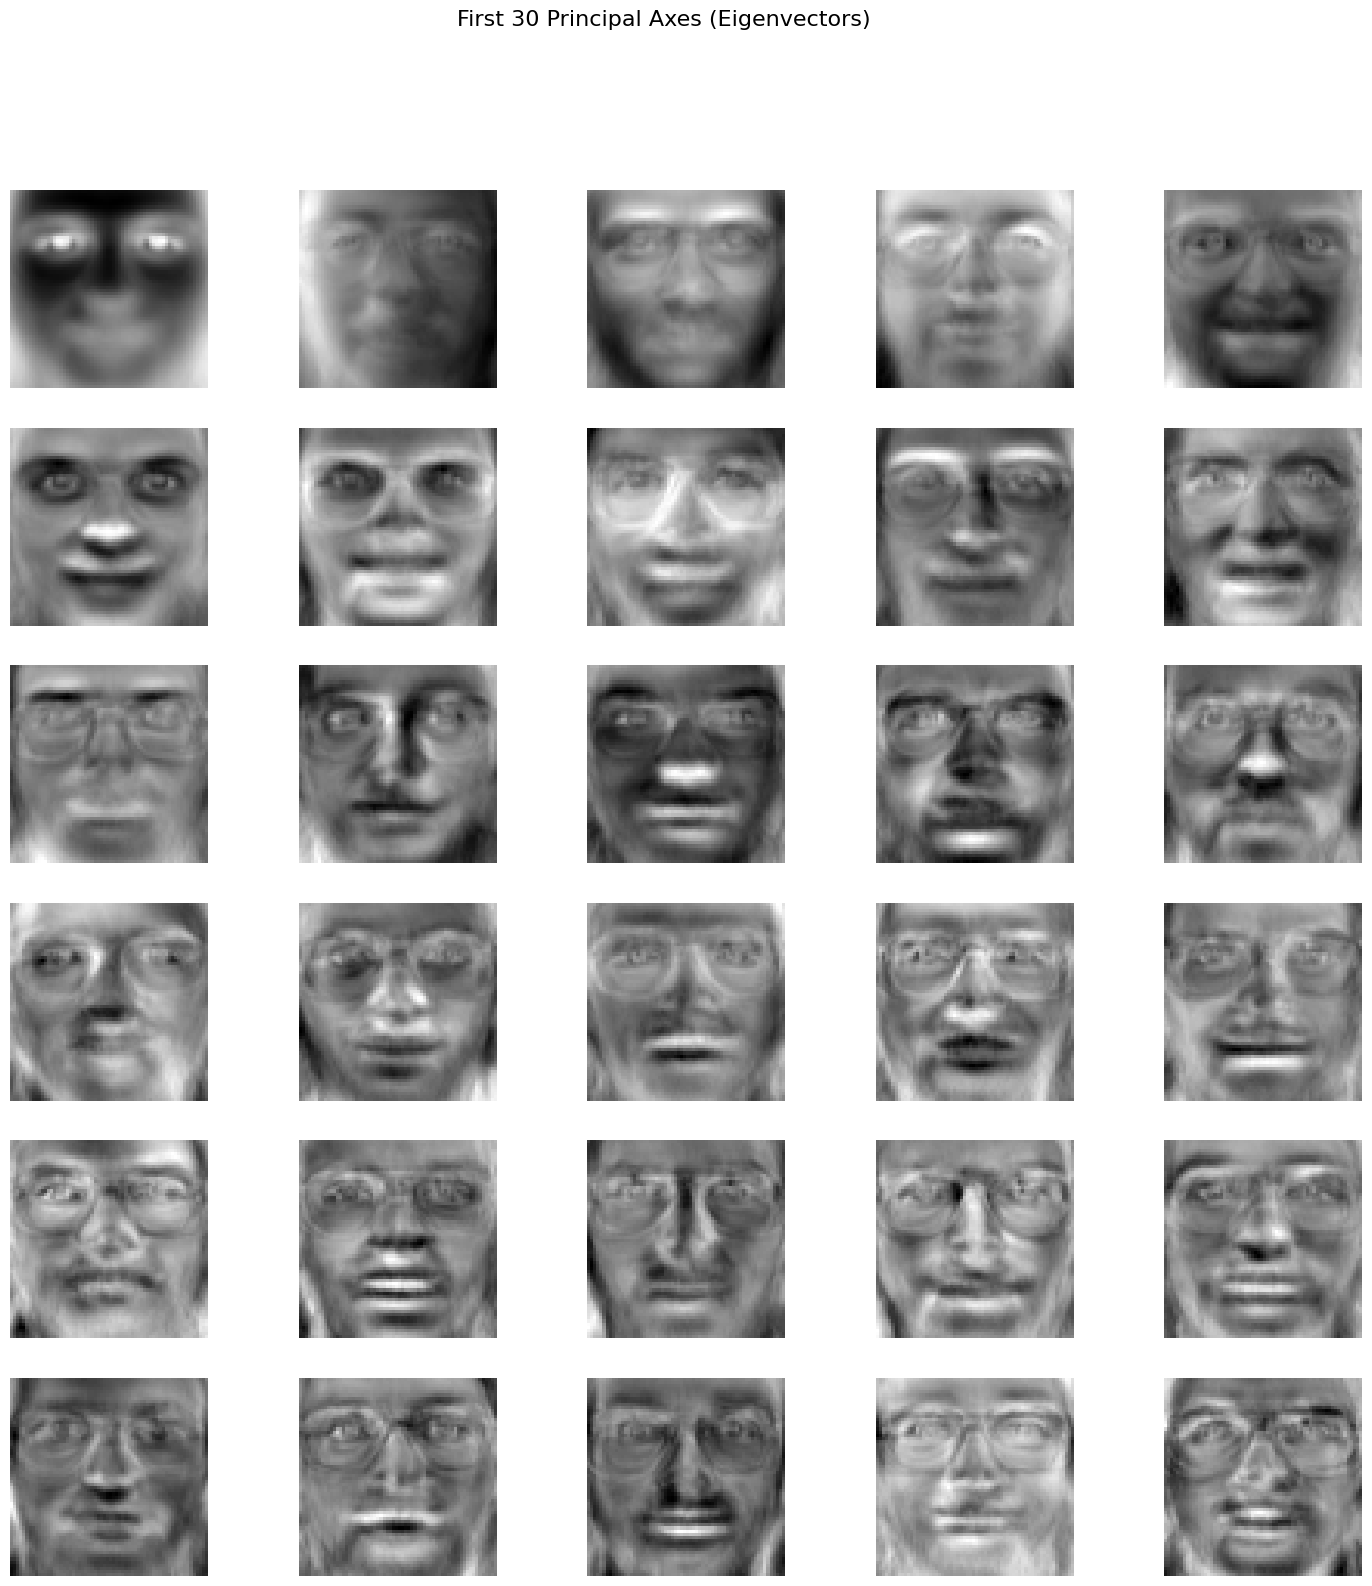

In [37]:
# Visualize the first 30 principal axes
fig, axs = plt.subplots(nrows=6, ncols=5, figsize=(18, 18))

for i in range(6):
    for j in range(5):
        axs[i, j].imshow(U_full[:, 5*i+j].reshape((64, 64)), cmap='gray')
        axs[i, j].axis('off')

plt.suptitle('First 30 Principal Axes (Eigenvectors)', fontsize=16)
plt.show()

9. Compute the first two principal components related to the subset of images corresponding to labels = 0, 39.

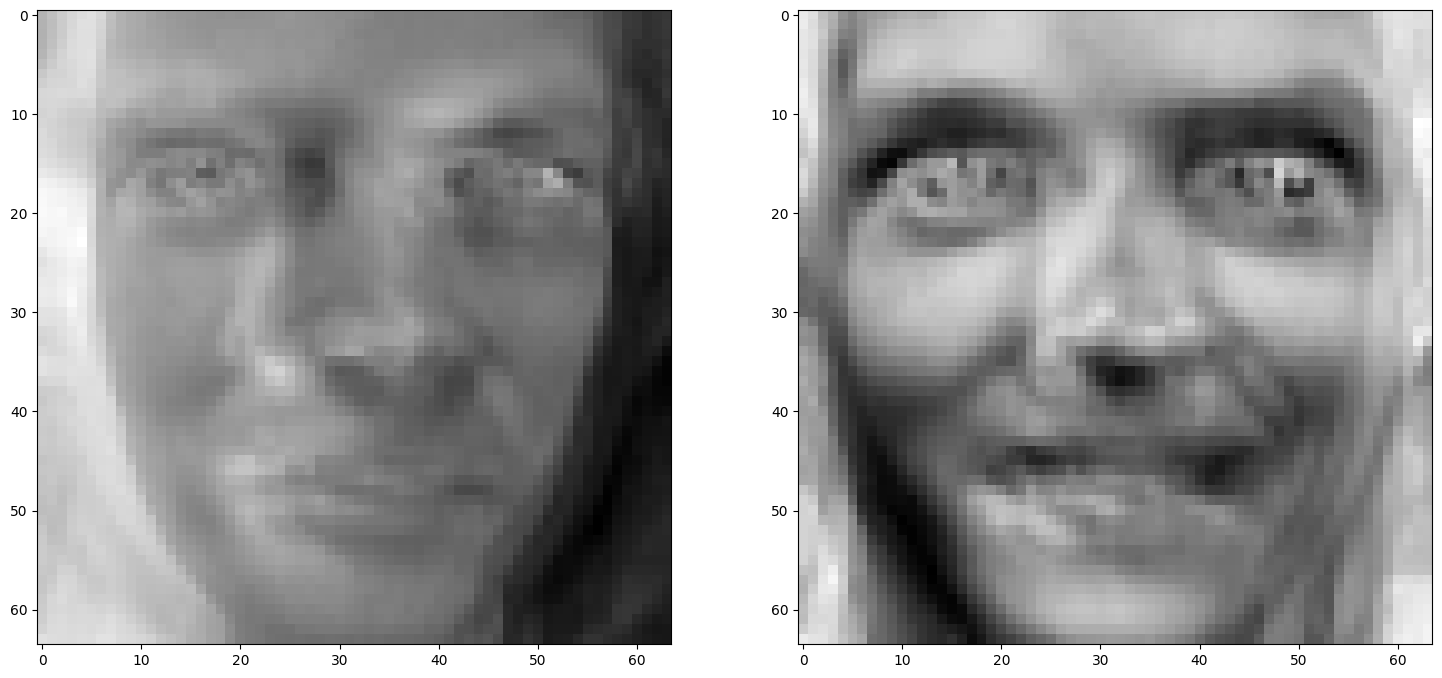

In [42]:
zero_lebelled = np.where(labels==0)[0]
thirtynine_labelled = np.where(labels==39)[0]
selected = np.union1d(zero_lebelled, thirtynine_labelled)

X_sub = np.array([X[:,i] for i in selected]).T
X_sub_centered = X_sub - X_sub.mean(axis=1)[:,None]

U_sub, s_sub, VT_sub = np.linalg.svd(X_sub_centered)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,18))
for i in range(2):
    axs[i].imshow(U_sub[:,i].reshape((64,64)))
plt.show()

10. Create a scatterplot for the first 2 principal components of the subset of images grouped by label. Comment what you see.

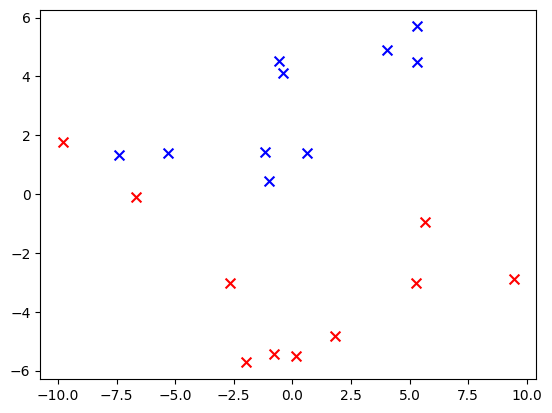

In [44]:
fig = plt.figure()

for i in range (X_sub_centered.shape[1]):
    x = X_sub_centered[:,i].T @ U_sub[:,0]
    y = X_sub_centered[:,i].T @ U_sub[:,1]
    if i < len(zero_lebelled):
        col = 'r'
    else:
        col = 'b'
    plt.scatter(x,y, marker='x', s=50,color=col)
plt.show()

# ESERCIZIO 2

In [46]:
import numpy as np

def ridge_regression_loss(Y, X, beta, lambda_reg):
    residual = Y - X.dot(beta)
    loss = np.linalg.norm(residual)**2 + lambda_reg * np.linalg.norm(beta)**2
    return loss


The goal is to find the β that minimizes this loss. To do this, we take the derivative of the loss with respect to β and set it to zero:

$\frac{\partial J(\beta)}{\partial \beta} = -2X^T(Y - X\beta) + 2\lambda\beta = 0$

Solving for β, we get:

$X^TX\beta + \lambda I\beta = X^TY$

Now, solving for β, we obtain the Ridge regression solution:

$\beta = (X^TX + \lambda I)^{-1}X^TY$

Here, $I$ is the identity matrix. The term $(X^TX + \lambda I)^{-1}$ is invertible as long as $\lambda > 0$. This regularization term helps stabilize the inversion of the matrix, especially when $X^TX$ is close to singular.




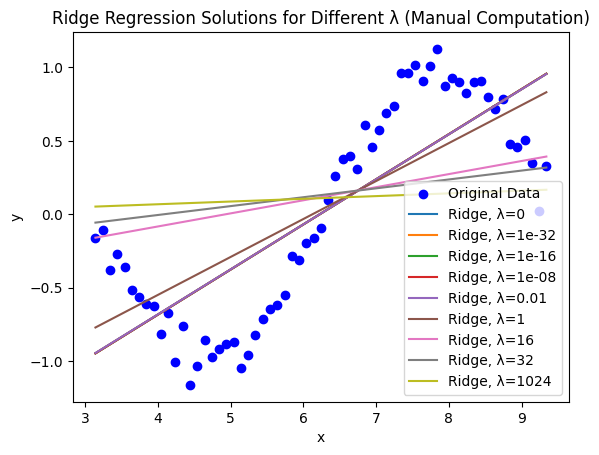

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset
np.random.seed(55)
x = np.arange(np.pi, 3*np.pi, 0.1)
y = np.sin(x) + np.random.normal(0, 0.1, len(x))

# Regularization parameters
lambda_values = [0, 1e-32, 1e-16, 1e-8, 1e-2, 1, 16, 32, 1024]

# Polynomial features (degree 1)
X = np.vstack([np.ones_like(x), x]).T

# Plot original data
plt.scatter(x, y, label='Original Data', color='blue')

# Perform Ridge regression for each lambda
for lambda_val in lambda_values:
    # Ridge regression solution
    w_star = np.linalg.inv(X.T @ X + lambda_val * np.identity(2)) @ X.T @ y
    y_pred = X @ w_star

    # Plot Ridge regression solution
    plt.plot(x, y_pred, label=f'Ridge, λ={lambda_val}')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Ridge Regression Solutions for Different λ (Manual Computation)')
plt.legend()
plt.show()

# ESERCIZIO 3

Consider the quadratic function

$
J(x) = \frac{1}{2} x^TAx - b^T x
$

where $A \in \mathbb{R}^{n \times n}$ is symmetric positive definite (SPD) and $b \in \mathbb{R}^n$.

### 1. Compute gradient and Hessian of $J$
GRADIENT:

$
\nabla J(x) = Ax - b
$

HESSIAN:

$
\nabla^2 J(x) = A
$

### 2. Verify that J is strictly convex and find the unique global minimum of $J$.



### 3. Let $x ∈ R^n$ and $q ∈ R^n$ a direction s.t. $∇J(x)T q < 0$. Compute analytically the step length α that solve the following exact line-search problem: $\\min_{α>0} J(x + αq)$"


Given $x ∈ R^n$ and $q ∈ R^n$ a direction s.t. $∇J(x)T q < 0$, we want to find $α > 0$ that minimizes $J(x + αq)$.



*   The objective function to minimize is $J(x+αq)$.
*   Differentiate the objective function with respect to α and set it to zero: $\frac{d}{d\alpha} J(x + \alpha q) = 0$
*   Solve the equation obtained in the previous step for α.
*   Ensure that the second derivative is positive to confirm it's a minimum: $\frac{d^2}{d\alpha^2} J(x + \alpha q) > 0$



